## Classifying the Customers :

In [198]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
class Class_Fit(object):
    def __init__(self, clf, params = None):
        if params:
            self.clf = clf(**params)
        else:
            self.clf = clf()
            
    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
    
    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} %".format(100 * accuracy_score(Y, self.predictions)))

In [197]:
data['target'].dtypes

dtype('O')

In [206]:
data['target'] = data['target'].astype(str)

In [210]:
columns = ['renda_mes_media', 'age','recencia_dias','vinho_montante','frutas_montante','carne_montante','peixe_montante','doces_montante','ouro_montante','promocoes_desconto','promocoes_web','promocoes_catalogo','promocoes_store','num_visit_web_ult_mes','Cmp3','Cmp4','Cmp5','Cmp1','Cmp2','reclamacoes','fit_segmentacao','campaing_engagement']
X = data[columns]
Y = data['target']

In [72]:
Y=Y.astype(int)
n_instances = len(X)
p_instances = Y.sum() / len(Y)
p_targeted = 0.15
n_targeted = int(n_instances*p_targeted)

print('Number of instances: {:,}'.format(n_instances))
print('Number of conversions {:,}'.format(Y.sum()))
print('Conversion rate: {:.2f}%'.format(p_instances*100.))
print('15% of the population {:,}'.format(n_targeted))
print('Expected number of conversions targetting {:,} @ {:.2f}%: {:,}'.format(n_targeted, p_instances*100., int(p_instances * n_targeted)))

Number of instances: 2,240
Number of conversions 334
Conversion rate: 14.91%
15% of the population 336
Expected number of conversions targetting 336 @ 14.91%: 50


#### Train, Test Splitting 

In [208]:
from sklearn.model_selection import train_test_split

In [213]:
X=X.fillna(0)
X=X.astype(int)
Y=Y.astype(str)

In [214]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

## Training Models :

In [215]:
from sklearn.svm import LinearSVC
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [216]:
svc = Class_Fit(clf=LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)

In [217]:
svc.grid_fit(X=X_train, Y=Y_train)

In [218]:
svc.grid_predict(X_test, Y_test)

Precision: 85.04 %


In [219]:
from sklearn.metrics import confusion_matrix

In [220]:
class_names = [i for i in range(1,11)]
cnf = confusion_matrix(Y_test, svc.predictions)
cnf

array([[380,   1],
       [ 66,   1]], dtype=int64)

In [221]:
# Code from sklearn documentation.
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

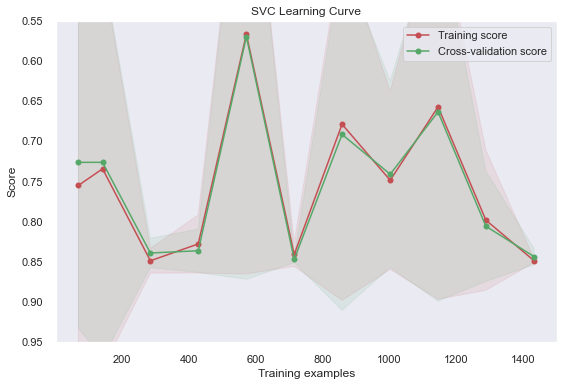

In [226]:
g = plot_learning_curve(svc.grid.best_estimator_, "SVC Learning Curve", X_train, Y_train, ylim=[0.95, 0.55], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

#### Logistic Regression

In [227]:
from sklearn.linear_model import LogisticRegression

In [228]:
lr = Class_Fit(clf = LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-4,6,16)}], Kfold = 17)
lr.grid_fit(X_train, Y_train)
lr.grid_predict(X_test, Y_test)

Precision: 85.04 %


In [229]:
cnf = confusion_matrix(Y_test, lr.predictions)
cnf

array([[369,  12],
       [ 55,  12]], dtype=int64)

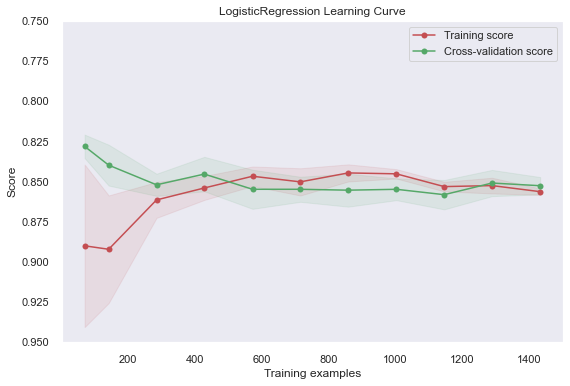

In [230]:
g = plot_learning_curve(lr.grid.best_estimator_, "LogisticRegression Learning Curve", X_train, Y_train, ylim=[.95, 0.75], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

#### K-Nearest Neighbours :

In [231]:
from sklearn.neighbors import KNeighborsClassifier

In [232]:
knn = Class_Fit(clf = KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors':np.arange(1,50,1)}], Kfold = 10)
knn.grid_fit(X_train, Y_train)
knn.grid_predict(X_test, Y_test)

Precision: 83.93 %


In [233]:
cnf = confusion_matrix(Y_test, knn.predictions)
cnf

array([[369,  12],
       [ 60,   7]], dtype=int64)

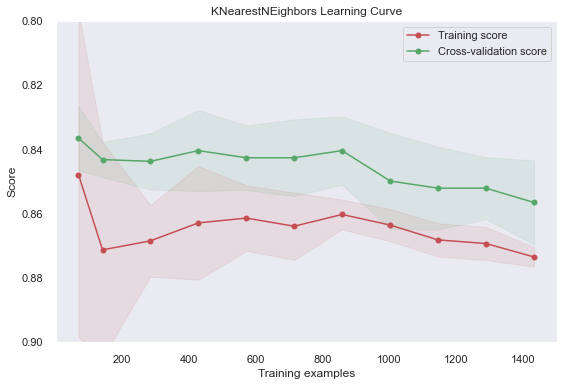

In [234]:
g = plot_learning_curve(knn.grid.best_estimator_, "KNearestNEighbors Learning Curve", X_train, Y_train, ylim=[.9, 0.8], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

#### Decision Trees :

In [235]:
from sklearn.tree import DecisionTreeClassifier

In [236]:
tr = Class_Fit(clf = DecisionTreeClassifier)
tr.grid_search(parameters = [{'criterion':['entropy', 'gini'], 'max_features':['sqrt', 'log2']}], Kfold = 3)
tr.grid_fit(X_train, Y_train)
tr.grid_predict(X_test, Y_test)

Precision: 81.03 %


In [237]:
cnf = confusion_matrix(Y_test, tr.predictions)
cnf

array([[341,  40],
       [ 45,  22]], dtype=int64)

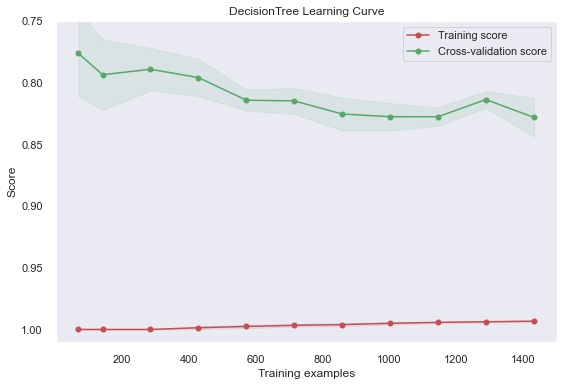

In [238]:
g = plot_learning_curve(tr.grid.best_estimator_, "DecisionTree Learning Curve", X_train, Y_train, ylim=[1.01, 0.75], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

#### Random Forests:

In [239]:
from sklearn.ensemble import RandomForestClassifier

In [240]:
rf = Class_Fit(clf = RandomForestClassifier)
rf.grid_search(parameters = [{'criterion':['entropy', 'gini'], 
                              'max_features':['sqrt', 'log2'], 'n_estimators':[40, 60, 80, 100, 140]}], Kfold = 5)
rf.grid_fit(X_train, Y_train)
rf.grid_predict(X_test, Y_test)

Precision: 86.61 %


In [258]:
cnf = confusion_matrix(Y_test, rf.predictions)
cnf

array([[385,   5],
       [ 42,  16]], dtype=int64)

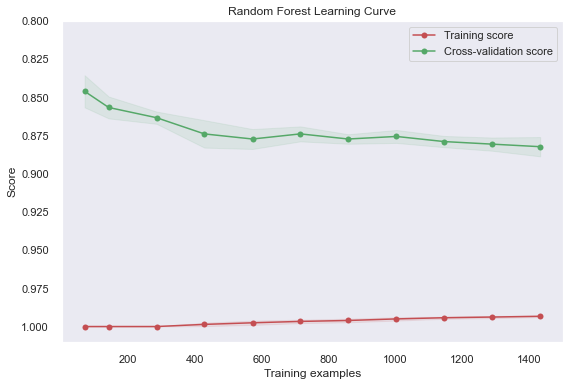

In [241]:
g = plot_learning_curve(rf.grid.best_estimator_, "Random Forest Learning Curve", X_train, Y_train, ylim=[1.01, 0.8], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [242]:
from sklearn.ensemble import AdaBoostClassifier

In [244]:
ada = Class_Fit(clf = AdaBoostClassifier)
ada.grid_search(parameters = [{'n_estimators':[20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 130]}], Kfold = 8)
ada.grid_fit(X_train, Y_train)
ada.grid_predict(X_test, Y_test)

Precision: 86.16 %


In [245]:
cnf = confusion_matrix(Y_test, ada.predictions)
cnf

array([[358,  23],
       [ 39,  28]], dtype=int64)

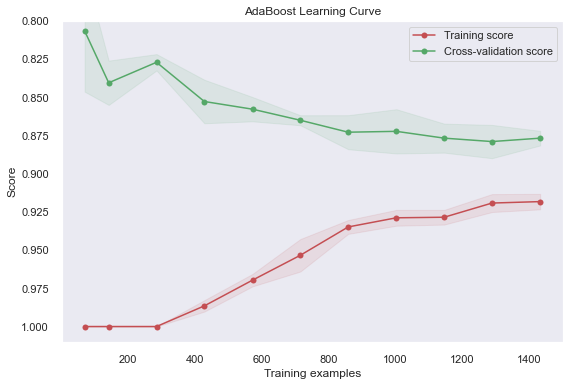

In [246]:
g = plot_learning_curve(ada.grid.best_estimator_, "AdaBoost Learning Curve", X_train, Y_train, ylim=[1.01, 0.8], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

#### Gradient Boosted Decision Trees :

In [248]:
import xgboost

In [249]:
gbdt = Class_Fit(clf = xgboost.XGBClassifier)
gbdt.grid_search(parameters = [{'n_estimators':[20, 30, 40, 50, 60, 70, 80, 90, 100, 120]}], Kfold = 5)
gbdt.grid_fit(X_train, Y_train)
gbdt.grid_predict(X_test, Y_test)

Precision: 85.71 %


In [250]:
cnf = confusion_matrix(Y_test, gbdt.predictions)
cnf

array([[363,  18],
       [ 46,  21]], dtype=int64)

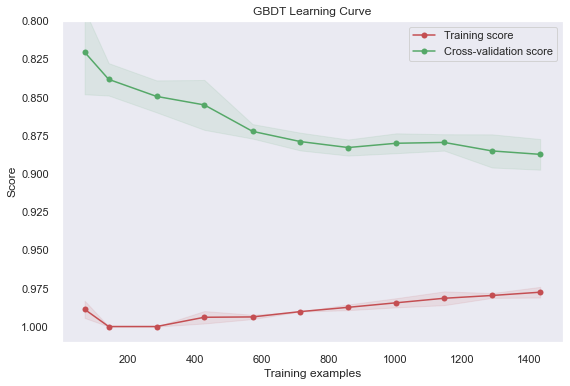

In [251]:
g = plot_learning_curve(gbdt.grid.best_estimator_, "GBDT Learning Curve", X_train, Y_train, ylim=[1.01, 0.8], cv = 5,
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

#### Voting Classifier :

In [252]:
rf_best = RandomForestClassifier(**rf.grid.best_params_)
gbdt_best = xgboost.XGBClassifier(**gbdt.grid.best_params_)
svc_best = LinearSVC(**svc.grid.best_params_)
tr_best = DecisionTreeClassifier(**tr.grid.best_params_)
knn_best = KNeighborsClassifier(**knn.grid.best_params_)
lr_best = LogisticRegression(**lr.grid.best_params_)

In [253]:
from sklearn.ensemble import VotingClassifier

In [263]:
votingC = VotingClassifier(estimators=[('rf', rf_best), ('gb', gbdt_best), ('knn', knn_best), ('lr', lr_best),('svc', svc_best),('tr', tr_best)])

In [264]:
votingC = votingC.fit(X_train, Y_train)

In [265]:
predictions = votingC.predict(X_test)

In [266]:
print("Precision : {:.2f}%".format(100 * accuracy_score(Y_test, predictions)))

Precision : 85.71%


In [267]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       381
           1       0.59      0.15      0.24        67

    accuracy                           0.86       448
   macro avg       0.73      0.57      0.58       448
weighted avg       0.83      0.86      0.82       448



#### Testing Model

In [268]:
X

,renda_mes_media,age,recencia_dias,vinho_montante,frutas_montante,carne_montante,peixe_montante,doces_montante,ouro_montante,promocoes_desconto,promocoes_web,promocoes_catalogo,promocoes_store,num_visit_web_ult_mes,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,reclamacoes,fit_segmentacao,campaing_engagement
0,4844,63,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,0,0
1,3862,66,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,2,0
2,5967,55,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0
3,2220,36,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,2,0
4,4857,39,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,5101,53,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,1,0
2236,5334,74,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,1,0
2237,4748,39,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,0
2238,5770,64,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,1,0


In [269]:
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [270]:
predictions = votingC.predict(X)

In [271]:
print("Precision : {:.2f}%".format(100 * accuracy_score(Y, predictions)))

Precision : 91.83%
